In [1]:
import sys
sys.path.append("..")

from tree_parser import file_contents, meta_math_database

from my_utils import print_proof_props_graph, get_proof_steps, print_ident_proof, print_proof_linear_steps
from my_utils import get_proof_steps_graph, print_proof_steps_graph


from expanding import construct_proof

In [2]:
%%time

text = file_contents("../set.mm")
database = meta_math_database(text,n=3500)

included 5555695 tokens from ../set.mm
proposition: 3500CPU times: user 9.69 s, sys: 315 ms, total: 10 s
Wall time: 10.2 s


In [3]:
prop = database.propositions["dfss2"]
prop_proof = construct_proof(prop)

In [4]:
prop_proof.print_linear()

 <PPStep:bitr4i ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ) )>
 |  <PPStep:3bitri ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  <PPStep:dfss ⊢ ( A ⊆ B ↔ A = ( A ∩ B ) )>
 |  |  <PPStep:eqeq2i ⊢ ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } )>
 |  |  |  <PPStep:df-in ⊢ ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) }>
 |  |  <PPStep:abeq2 ⊢ ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  <PPStep:albii ⊢ ( ∀ x ( x ∈ A → x ∈ B ) ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  <PPStep:pm4.71 ⊢ ( ( x ∈ A → x ∈ B ) ↔ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>


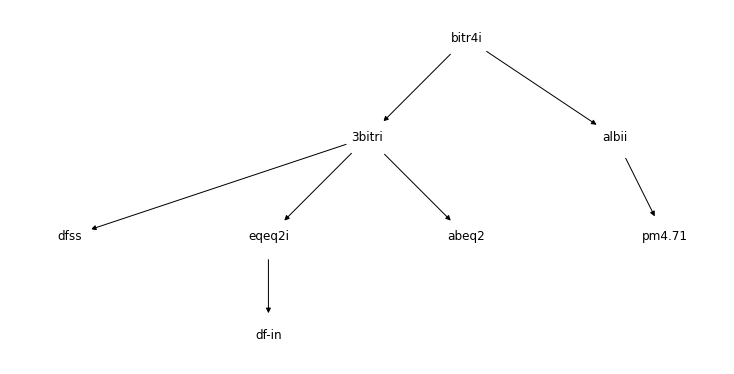

In [5]:
prop_proof.print_graph()

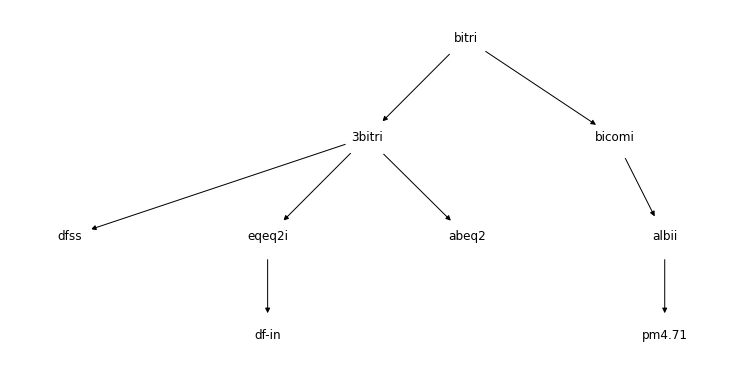

In [6]:
prop_proof = prop_proof.expand()
prop_proof.print_graph()

<PPStep:eqeq2i ⊢ ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } )>


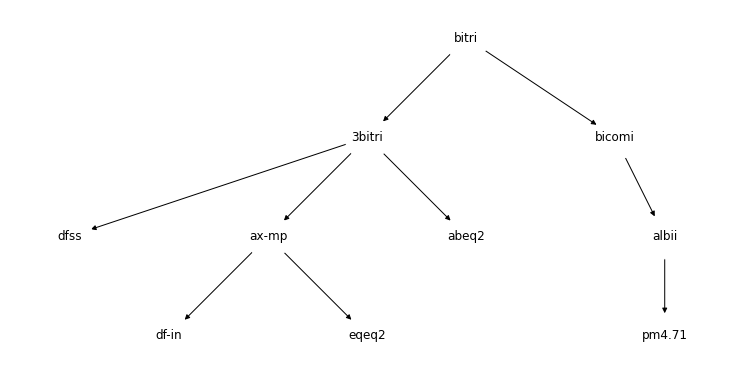

In [7]:
_p_step = prop_proof.inputs[0].inputs[1]
print(_p_step)
prop_proof = _p_step.expand()
prop_proof.print_graph()

<PPStep:abeq2 ⊢ ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>


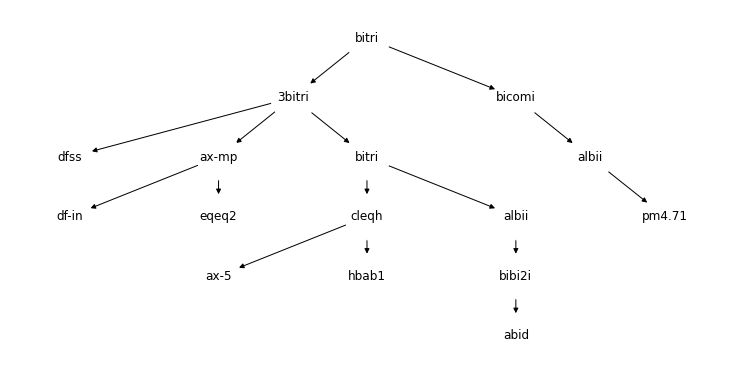

In [8]:
_p_step = prop_proof.inputs[0].inputs[2]
print(_p_step)
prop_proof = _p_step.expand()
prop_proof.print_graph()

<PPStep:cleqh ⊢ ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ x ∈ { x | ( x ∈ A ∧ x ∈ B ) } ) )>


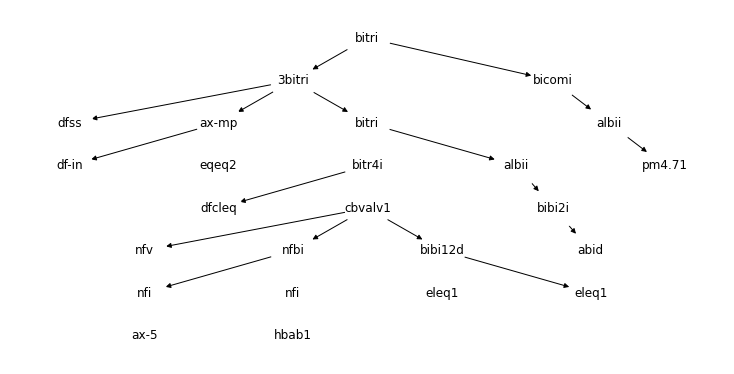

In [9]:
_p_step = prop_proof.inputs[0].inputs[2].inputs[0]
print(_p_step)
prop_proof = _p_step.expand()
prop_proof.print_graph()

In [10]:
prop_proof.inputs[0].inputs[1]

<PPStep:ax-mp ⊢ ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } )>

In [11]:
prop_proof.inputs[0].inputs[1].inputs

[<PPStep:df-in ⊢ ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) }>,
 <PPStep:eqeq2 ⊢ ( ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) } → ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } ) )>]

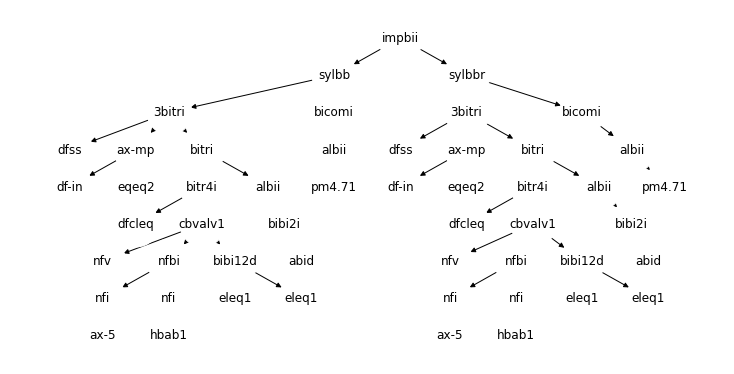

In [12]:
prop_proof = prop_proof.expand()
prop_proof.print_graph()

In [13]:
prop_proof

<PPStep:impbii ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ) )>

In [14]:
prop_proof.inputs[1]

<PPStep:sylbbr ⊢ ( ∀ x ( x ∈ A → x ∈ B ) → A ⊆ B )>

In [15]:
prop_proof.inputs[1].inputs

[<PPStep:3bitri ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>,
 <PPStep:bicomi ⊢ ( ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) ↔ ∀ x ( x ∈ A → x ∈ B ) )>]

In [16]:
prop_proof.print_linear()

 <PPStep:impbii ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ) )>
 |  <PPStep:sylbb ⊢ ( A ⊆ B → ∀ x ( x ∈ A → x ∈ B ) )>
 |  |  <PPStep:3bitri ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  |  <PPStep:dfss ⊢ ( A ⊆ B ↔ A = ( A ∩ B ) )>
 |  |  |  <PPStep:ax-mp ⊢ ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } )>
 |  |  |  |  <PPStep:df-in ⊢ ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) }>
 |  |  |  |  <PPStep:eqeq2 ⊢ ( ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) } → ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } ) )>
 |  |  |  <PPStep:bitri ⊢ ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  |  |  <PPStep:bitr4i ⊢ ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ x ∈ { x | ( x ∈ A ∧ x ∈ B ) } ) )>
 |  |  |  |  |  <PPStep:dfcleq ⊢ ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ y ( y ∈ A ↔ y ∈ { x | ( x ∈ A ∧ x ∈ B ) } ) )>
 |  |  |  |  |  <PPStep:cbvalv1 ⊢ ( ∀ x ( x ∈ A ↔ x ∈ { x | ( x ∈ A ∧ x ∈ B ) } ) ↔ ∀ y ( y ∈ A ↔ y ∈ { x | ( x ∈ A ∧ x ∈ B ) } ) )>
 |  |  |  |  |  |  <PPStep:nfv ⊢ Ⅎ y ( x 

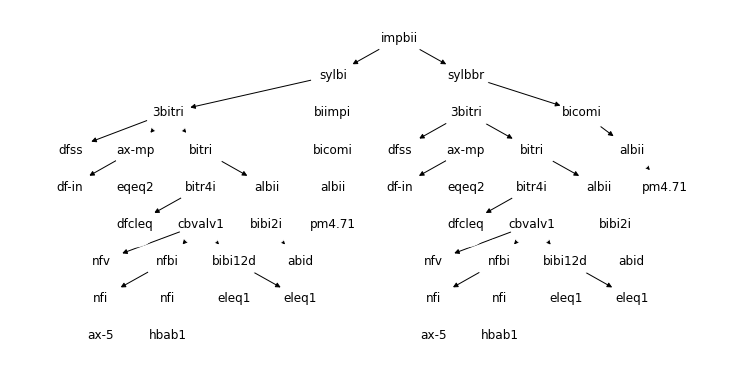

In [17]:
prop_proof = prop_proof.inputs[0].expand()
prop_proof.print_graph()

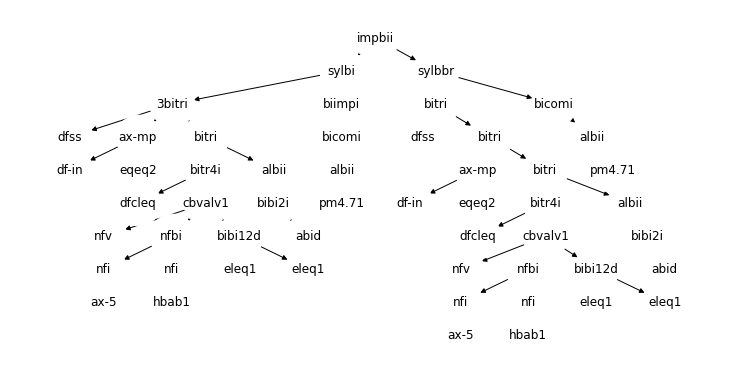

In [18]:
prop_proof.inputs[1].inputs[0].expand()
prop_proof.print_graph()

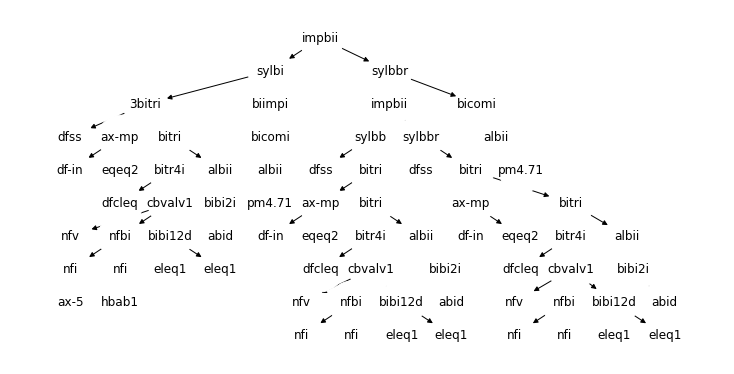

In [19]:
prop_proof.inputs[1].inputs[0].expand()
prop_proof.print_graph()

In [20]:
prop_proof.inputs[1].inputs[0].inputs[0].inputs[0].expand()

<PPStep:impbii ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ) )>

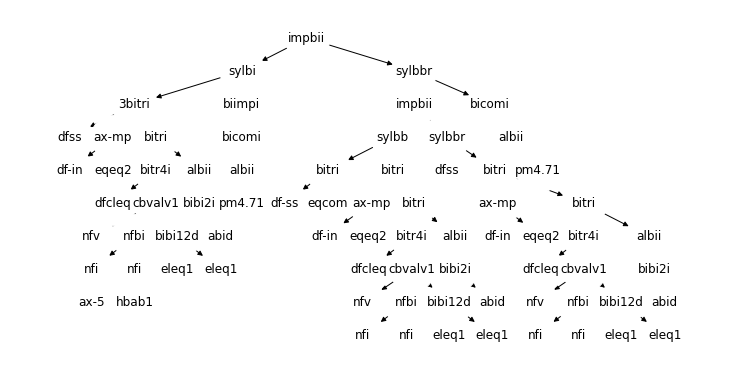

In [21]:
prop_proof.print_graph()

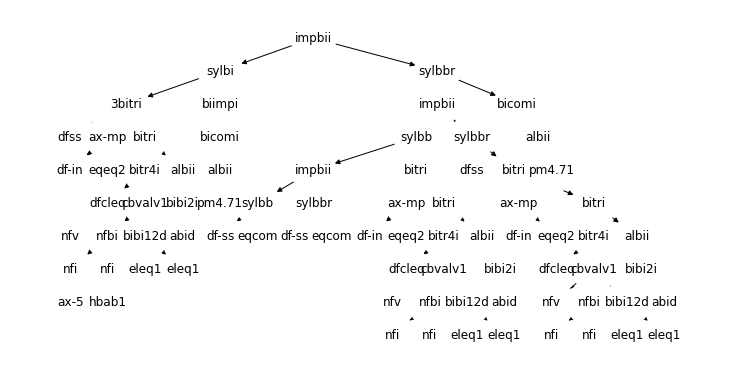

In [22]:
prop_proof.inputs[1].inputs[0].inputs[0].inputs[0].expand()
prop_proof.print_graph()

In [23]:
prop_proof.print_linear()

 <PPStep:impbii ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ) )>
 |  <PPStep:sylbi ⊢ ( A ⊆ B → ∀ x ( x ∈ A → x ∈ B ) )>
 |  |  <PPStep:3bitri ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  |  <PPStep:dfss ⊢ ( A ⊆ B ↔ A = ( A ∩ B ) )>
 |  |  |  <PPStep:ax-mp ⊢ ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } )>
 |  |  |  |  <PPStep:df-in ⊢ ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) }>
 |  |  |  |  <PPStep:eqeq2 ⊢ ( ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) } → ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } ) )>
 |  |  |  <PPStep:bitri ⊢ ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  |  |  <PPStep:bitr4i ⊢ ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ x ∈ { x | ( x ∈ A ∧ x ∈ B ) } ) )>
 |  |  |  |  |  <PPStep:dfcleq ⊢ ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ y ( y ∈ A ↔ y ∈ { x | ( x ∈ A ∧ x ∈ B ) } ) )>
 |  |  |  |  |  <PPStep:cbvalv1 ⊢ ( ∀ x ( x ∈ A ↔ x ∈ { x | ( x ∈ A ∧ x ∈ B ) } ) ↔ ∀ y ( y ∈ A ↔ y ∈ { x | ( x ∈ A ∧ x ∈ B ) } ) )>
 |  |  |  |  |  |  <PPStep:nfv ⊢ Ⅎ y ( x 